In [0]:
%tensorflow_version 2.x 

In [0]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [0]:
import tensorflow as tf

In [0]:
from tensorflow.keras.datasets import fashion_mnist

In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# 欣賞數據集資料


In [6]:
len(x_train)

60000

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

這個東西是 Trouser


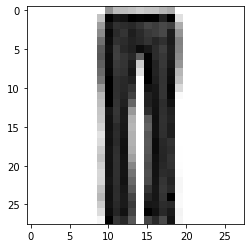

In [8]:
n = 9527
print("這個東西是", class_names[y_train[n]])
plt.imshow(x_train[n] , cmap="Greys")


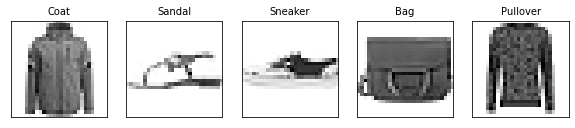

In [9]:
pick = np.random.choice(60000, 5, replace = False)
plt.figure(figsize=(10,10))
for i in range(5) : 
  n = pick[i]
  ax = plt.subplot(151+i)
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(class_names[y_train[n]], fontsize=10)
  plt.imshow(x_train[n], cmap='Greys')  

# 資料整理



In [0]:
x_train = x_train / 255
x_test = x_test / 255

In [0]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [0]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [13]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# 打造神經網路

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [0]:
model= Sequential()

In [0]:
model.add(Dense(74, input_dim = 784 , activation='relu'))

In [0]:
model.add(Dense(90, activation='relu'))

In [0]:
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(loss="mse",optimizer=SGD(lr=0.072),metrics=["accuracy"])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 74)                58090     
_________________________________________________________________
dense_1 (Dense)              (None, 90)                6750      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                910       
Total params: 65,750
Trainable params: 65,750
Non-trainable params: 0
_________________________________________________________________


# 訓練

In [22]:
model.fit(x_train, y_train, batch_size=100, epochs=25)

Epoch 1/25
600/600 [==============================] - 1s 2ms/step - loss: 0.0773 - accuracy: 0.3909
Epoch 2/25
600/600 [==============================] - 1s 2ms/step - loss: 0.0517 - accuracy: 0.6416
Epoch 3/25
600/600 [==============================] - 1s 2ms/step - loss: 0.0404 - accuracy: 0.7238
Epoch 4/25
600/600 [==============================] - 1s 2ms/step - loss: 0.0358 - accuracy: 0.7651
Epoch 5/25
600/600 [==============================] - 1s 2ms/step - loss: 0.0326 - accuracy: 0.7863
Epoch 6/25
600/600 [==============================] - 1s 2ms/step - loss: 0.0304 - accuracy: 0.8001
Epoch 7/25
600/600 [==============================] - 1s 2ms/step - loss: 0.0288 - accuracy: 0.8100
Epoch 8/25
600/600 [==============================] - 1s 2ms/step - loss: 0.0276 - accuracy: 0.8172
Epoch 9/25
600/600 [==============================] - 1s 2ms/step - loss: 0.0267 - accuracy: 0.8225
Epoch 10/25
600/600 [==============================] - 1s 2ms/step - loss: 0.0259 - accuracy: 0.8273

# 結果


In [23]:
result = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


預測為: Pullover


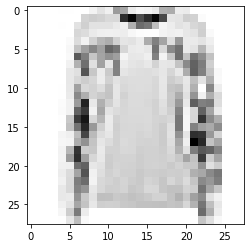

In [29]:
n = 9259

print("預測為:" , class_names[result[n]])
plt.imshow(x_test[n].reshape(28,28), cmap='Greys')